In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D



In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 6s 0us/step


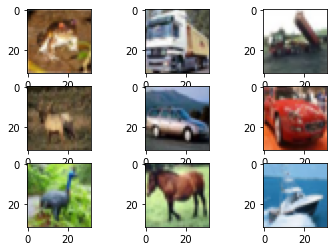

In [ ]:
from matplotlib import pyplot
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(x_train)

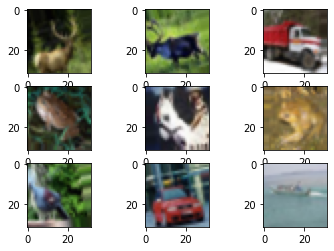

In [ ]:
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255

number_of_classes = 10
from keras.utils import np_utils
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [ ]:
def plothist(hist):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
#kernel_initializer is the function responsible for randomizing the weights 
#maxpooling layer downsizes the matrix by picking out the max value input for each matrix. (imagine a 2*2 matrix over a 3*3 matrix)
#dropout layer is used to reduce overfitting and to drop a certain ratio of nodes at every layer
from tensorflow.keras.optimizers import SGD
from keras.regularizers import l2
def baseline_model():
  model=Sequential()
  model.add(Conv2D(32, (5,5) , padding='same' , kernel_initializer='he_uniform' ,  input_shape= (32,32,3) , activation='relu'))
  model.add(Conv2D(32, (5,5) , padding='same' , kernel_initializer='he_uniform' ,  activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (5,5) , padding='same' , kernel_initializer='he_uniform' ,   activation='relu'))
  model.add(Conv2D(64, (5,5) , padding='same' , kernel_initializer='he_uniform' ,  activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (5,5) , padding='same' , kernel_initializer='he_uniform' ,   activation='relu'))
  model.add(Conv2D(128, (5,5) , padding='same' , kernel_initializer='he_uniform' ,  activation='relu'))
  
  model.add(Flatten())
  model.add(Dense(128, activation='relu',  kernel_regularizer=l2(0.001)))
  model.add(Dropout(0.2))
  model.add(Dense(10 , activation='softmax'))

  opt = SGD(lr=0.001, momentum=0.9)

  model.compile(loss='categorical_crossentropy' , optimizer=opt , metrics=['accuracy'])
  return model

In [ ]:
model=baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        102464    
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.fit(x_train , y_train , epochs=20)

Epoch 1/20
1563/1563 [==============================] - 656s 419ms/step - loss: 2.0395 - accuracy: 0.3368
Epoch 2/20
1563/1563 [==============================] - 651s 416ms/step - loss: 1.6668 - accuracy: 0.4800
Epoch 3/20
1563/1563 [==============================] - 649s 415ms/step - loss: 1.4686 - accuracy: 0.5544
Epoch 4/20
1563/1563 [==============================] - 650s 416ms/step - loss: 1.3151 - accuracy: 0.6070
Epoch 5/20
1563/1563 [==============================] - 652s 417ms/step - loss: 1.1892 - accuracy: 0.6525
Epoch 6/20
1563/1563 [==============================] - 652s 417ms/step - loss: 1.0849 - accuracy: 0.6843
Epoch 7/20
1563/1563 [==============================] - 652s 417ms/step - loss: 1.0074 - accuracy: 0.7083
Epoch 8/20
1563/1563 [==============================] - 654s 418ms/step - loss: 0.9287 - accuracy: 0.7328
Epoch 9/20
1563/1563 [==============================] - 653s 418ms/step - loss: 0.8593 - accuracy: 0.7562
Epoch 10/20
1563/1563 [=======================

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


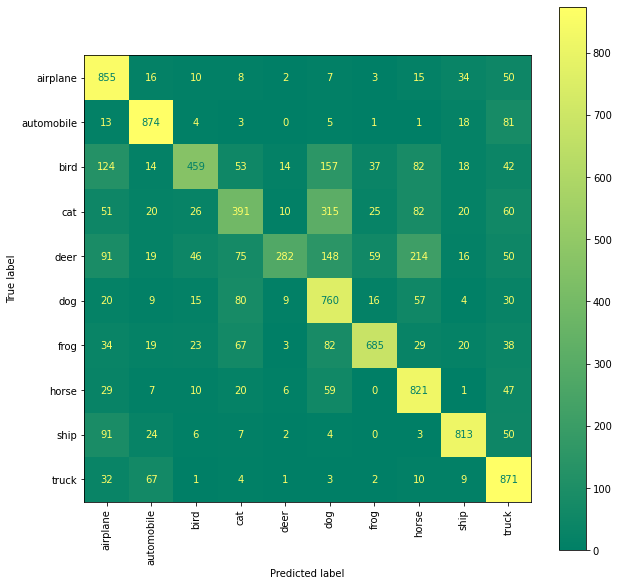

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73      1000
           1       0.82      0.87      0.84      1000
           2       0.77      0.46      0.57      1000
           3       0.55      0.39      0.46      1000
           4       0.86      0.28      0.42      1000
           5       0.49      0.76      0.60      1000
           6       0.83      0.69      0.75      1000
           7       0.62      0.82      0.71      1000
           8       0.85      0.81      0.83      1000
           9       0.66      0.87      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.71      0.68      0.67     10000
weighted avg       0.71      0.68      0.67     10000



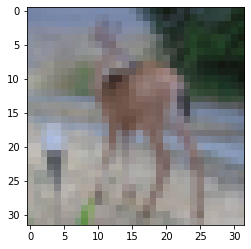

In [ ]:
my_image = x_test[100]
plt.imshow(my_image)

In [ ]:
y_test[100]

array([4], dtype=uint8)

In [ ]:
predictions = model.predict(x_test)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

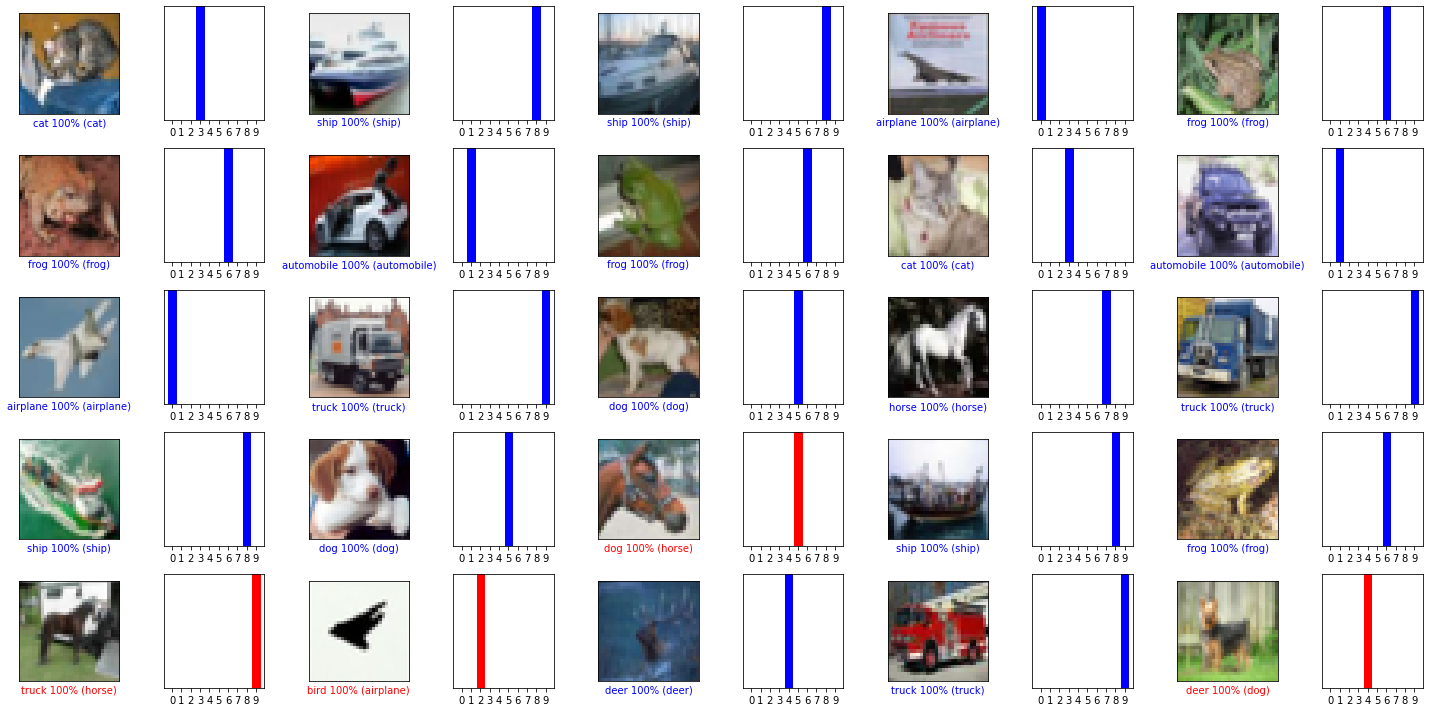

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model.save('cnn_20_epochs.h5')